<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Belén Ordenes
- Nombre de alumno 2: Javiera Donoso

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/javieradonoso/Repositorio-MDS7202/tree/main)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [109]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [110]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [111]:
#Codigo Aqui

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [112]:
#CODIGO AQUI

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [113]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

ModuleNotFoundError: No module named 'prophet'

**Respuesta:**

In [ ]:
#CODIGO AQUI

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [ ]:
#CODIGO AQUI

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [ ]:
#CODIGO AQUI

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [114]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split

import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [115]:
df_beers = pd.read_csv('cervezas.csv')
df_beers

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA
...,...,...,...,...,...
295054,863,45653,4.0,Consecration,American Wild Ale
295055,306,1341,4.0,Keystone Light,Light Lager
295056,8,8917,3.0,Drop Top Amber,American Amber / Red Ale
295057,35,102,3.0,Samuel Adams Octoberfest,Märzen / Oktoberfest


In [116]:
# Revisar si hay valores nulos en el dataset
valores_nulos = df_beers.isnull().sum()

# Contar cuántas cervezas se están evaluando y cuántos ciudadanos participaron
cervezas_unicas = df_beers['beerId'].nunique()
usuarios_unicos = df_beers['userId'].nunique()

valores_nulos, cervezas_unicas, usuarios_unicos

(userId       0
 beerId       0
 rating       0
 beerName     0
 beerStyle    0
 dtype: int64,
 3747,
 706)

A partir de una pequeña exploración se tienen las siguientes observaciones:
-  No hay valores nulos en ninguna de las columnas del dataset.
- Se están evaluando 3,747 cervezas únicas.
- Han participado 706 ciudadanos en la evaluación de las cervezas.

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

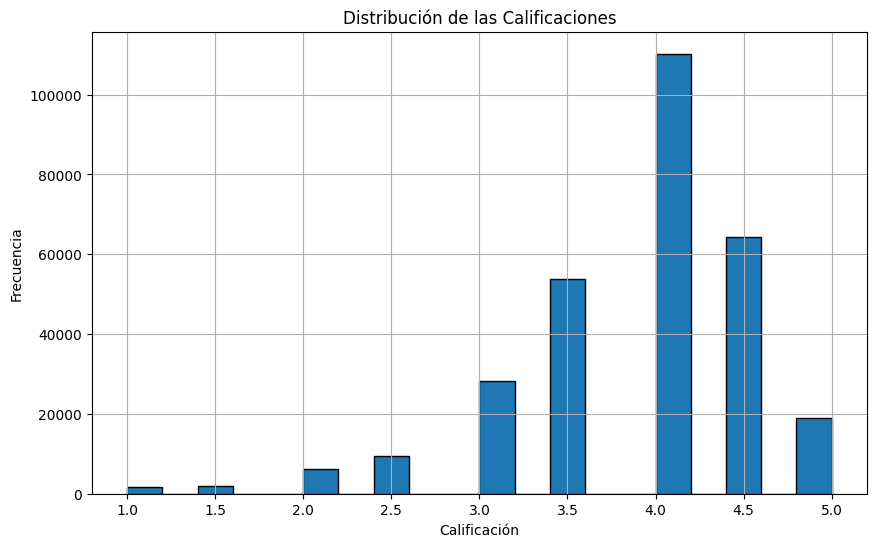

{'Usuarios Totales': 706,
 'Productos Totales': 3747,
 'Calificaciones Totales': 295059,
 'Calificaciones Faltantes': 0,
 'Media de Calificaciones': 3.8603669096689135}

In [117]:
# Número de usuarios y productos
usuarios_unicos
cervezas_unicas

# Número de calificaciones y calificaciones faltantes
calificaciones_totales = df_beers['rating'].count()
calificaciones_faltantes = df_beers['rating'].isnull().sum()

# Media de calificaciones
media_calificaciones = df_beers['rating'].mean()

# Agrupar calificaciones por cerveza
calificaciones_por_cerveza = df_beers.groupby('beerId')['rating'].mean()

# Crear gráficos de calificaciones
plt.figure(figsize=(10, 6))
plt.hist(df_beers['rating'], bins=20, edgecolor='black')
plt.title('Distribución de las Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Estadísticas descriptivas
resultados = {
    'Usuarios Totales': usuarios_unicos,
    'Productos Totales': cervezas_unicas,
    'Calificaciones Totales': calificaciones_totales,
    'Calificaciones Faltantes': calificaciones_faltantes,
    'Media de Calificaciones': media_calificaciones
}
resultados


Se puede observar que se tienen 3747 cervezas evaluadas, sin embargo, se cuenta con solo 706 usuarios, esto nos indica que los usuarios pueden evaluar más de una vez la misma cerveza o más de una cerveza. Según el gráfico, se tiene una gran cantidad de datos para la valoración 4 de 5, lo cual es bastante bueno.

In [118]:
# Agrupar por userId y beerId, tomando el promedio de las calificaciones duplicadas
df_beers_grouped = df_beers.groupby(['userId', 'beerId'], as_index=False).mean(numeric_only=True)

# Crear la matriz usuario-producto
matriz_usuario_producto = df_beers_grouped.pivot(index='userId', columns='beerId', values='rating')

# Mostrar la matriz
matriz_usuario_producto


beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La matriz de usuario-producto presenta una alta dispersión, donde se observa en gran cantidad valores NaN, lo que es común en sistemas de recomendación, donde cada usuario califica solo un subconjunto de los productos. Según los conceptos vistos en la clase, este escenario favorece el uso de técnicas de filtrado colaborativo para hacer recomendaciones basadas en las similitudes entre usuarios o productos. 

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [119]:
# Pregunta 1
# Se crea un nuevo DataFrame solo con las columnas beerName y beerStyle y sin contar duplicados
df_beers_unique = df_beers[['beerId','beerName', 'beerStyle']].drop_duplicates()
df_beers_unique

,beerId,beerName,beerStyle
0,995,Mai Bock,Maibock / Helles Bock
1,58695,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,4083,Stone Ruination IPA,American Double / Imperial IPA
3,40310,Noël Des Géants,Herbed / Spiced Beer
4,1904,Sierra Nevada Celebration Ale,American IPA
...,...,...,...
56171,47589,Red,American Amber / Red Ale
58257,62792,Splinter Black,American Double / Imperial Stout
60806,18432,Wittekerke Rosé,Fruit / Vegetable Beer
62517,4753,Hambleton Nightmare (Extra Stout Porter),English Porter


In [120]:
#Pregunta 2
# Crear el vectorizador de texto
vectorizer = CountVectorizer(lowercase=True, stop_words='english', min_df=10)

# Ajustar el vectorizador a la columna beerStyle
X = vectorizer.fit_transform(df_beers_unique['beerStyle']).toarray()

# Crear un DataFrame con el resultado
df_BoW = pd.DataFrame(df_BoW, columns=vectorizer.get_feature_names_out(),index=df_beers_unique['beerId'].drop_duplicates())
df_BoW


,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
beerId,,,,,,,,,,,,,,,,,,,,,
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58695,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40310,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47589,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62792,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18432,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
def get_recommendations(df, X, nombre_cerveza, n=5):
    df = df.reset_index(drop=True)
    # Encontrar el índice de la cerveza buscada
    indice_cerveza = df[df['beerName'] == nombre_cerveza].index[0]
    # Calcular la similitud coseno entre la cerveza buscada y todas las demás
    similitudes = cosine_similarity(X, X)
    
    # Obtener las similitudes para la cerveza buscada
    sim_scores = list(enumerate(similitudes[indice_cerveza]))
    
    # Ordenar las cervezas por similitud (en orden descendente)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los índices de las cervezas más similares
    sim_scores = sim_scores[1:n+1]
    beers_indices = [i[0] for i in sim_scores]
    
    # Retornar los nombres de las cervezas más similares
    cervezas_similares = df['beerName'].iloc[beers_indices].values
    
    # Mostrar los resultados con el porcentaje de similitud
    for indice, score in sim_scores:
        print(f"Cerveza: {df['beerName'].iloc[indice]}, Similitud: {score * 100:.2f}%")

# Probar la función con "Chocolate Porter"
get_recommendations(df=df_beers_unique, X=df_BoW, nombre_cerveza='Chocolate Porter')

Cerveza: Great Lakes Edmund Fitzgerald Porter, Similitud: 100.00%
Cerveza: Perseus Porter, Similitud: 100.00%
Cerveza: Southampton Imperial Porter, Similitud: 100.00%
Cerveza: Kona Coffee Macadamia Coconut Porter, Similitud: 100.00%
Cerveza: Black Marlin Porter, Similitud: 100.00%


In [122]:
#Pregunta 4
# Primero rescatamos la cerveza mejor calificada por el usuario
userId = 100 # usuario a recomendar
user_beer = df_beers[df_beers['userId'] == userId].sort_values('rating', ascending = False) # beer rateadas por el usuario
best_beer = user_movies.iloc[0]['beerName'] # beer con mejor rating
print(f'Cerveza mejor calificada por Homero: {best_beer}')

Cerveza mejor calificada por Homero: McNeill's Firehouse Amber Ale


In [123]:
# Obtener las 5 cervezas más similares a la mejor evaluada por Homero
get_recommendations(df=df_beers_unique, X=df_BoW, nombre_cerveza = best_beer)

Cerveza: Grail Ale, Similitud: 100.00%
Cerveza: Santa's Private Reserve Ale, Similitud: 100.00%
Cerveza: Hemp Hop Rye Amber Ale, Similitud: 100.00%
Cerveza: Autumn Fest, Similitud: 100.00%
Cerveza: Red Rocket Ale, Similitud: 100.00%


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [124]:
#Pregunta 1
# Transformar el DataFrame a un formato adecuado para surprise
reader = Reader(rating_scale=(1, 5))  # Escala de las calificaciones

# Creamos el dataset desde pandas utilizando solo userId, beerId y rating
df_collaborative = df_beers[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(df_collaborative, reader)
dataset

Se debe ordenar el dataset en userId, beerId, rating, esto es un paso clave para trabajar con Surprise.

In [125]:
#Pregunta 2
#Se divide el conjunto de entrenamiento y prueba
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 4200)
trainset

In [126]:
#Pregunta 3
# Definir las opciones de similitud usando coseno
sim_options = {
    'name': 'cosine',
    'user_based': True  # True: basado en usuarios, False: basado en ítems
}

# Crear el modelo KNN
model_knn_user = KNNBasic(sim_options=sim_options)

# Entrenar el modelo con el conjunto de entrenamiento
model_knn_user.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = model_knn_user.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [127]:
#Pregunta 4
# Calcular el MAE
mae = accuracy.mae(predictions)
# Convertir las predicciones a un DataFrame para análisis
df_predictions = pd.DataFrame(predictions)
display(df_predictions.head())  

MAE:  0.4664


,uid,iid,r_ui,est,details
0,1471,17207,3.5,3.612500,"{'actual_k': 40, 'was_impossible': False}"
1,7375,32041,4.0,3.722222,"{'actual_k': 18, 'was_impossible': False}"
2,13307,33929,3.5,3.525000,"{'actual_k': 40, 'was_impossible': False}"
3,1199,34146,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
4,262,53470,3.5,3.944444,"{'actual_k': 27, 'was_impossible': False}"


In [128]:
#Pregunta 5
# Definir las opciones de similitud usando coseno para productos
sim_options = {
    'name': 'cosine',
    'user_based': False  # Cambiar a False para que sea basado en productos
}

# Crear el modelo KNN basado en productos
model_knn_item = KNNBasic(sim_options=sim_options)

# Entrenar el modelo con el conjunto de entrenamiento
model_knn_item.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_item = model_knn_item.test(testset)

# Calcular el MAE para el modelo basado en productos
mae_item = accuracy.mae(predictions_item)

# Convertir las predicciones a un DataFrame para análisis
df_predictions_item = pd.DataFrame(predictions_item)
display(df_predictions_item.head()) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4666


,uid,iid,r_ui,est,details
0,1471,17207,3.5,3.612500,"{'actual_k': 40, 'was_impossible': False}"
1,7375,32041,4.0,3.822671,"{'actual_k': 34, 'was_impossible': False}"
2,13307,33929,3.5,3.525000,"{'actual_k': 40, 'was_impossible': False}"
3,1199,34146,4.0,3.987500,"{'actual_k': 40, 'was_impossible': False}"
4,262,53470,3.5,3.826689,"{'actual_k': 40, 'was_impossible': False}"


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [129]:
# Pregunta 1
model_nmf = NMF(random_state = 4200) 
model_nmf.fit(trainset) # fit del modelo
predictions_nmf = model_nmf.test(testset) # retorna un dataframe con el rating estimado 

In [130]:
# Pregunta 2
#Obtenemos el MAE
mae_nmf = accuracy.mae(predictions_nmf)

#Primeras predicciones
df_predictions_nmf = pd.DataFrame(predictions_nmf)
df_predictions_nmf

MAE:  0.4822


,uid,iid,r_ui,est,details
0,1471,17207,3.5,3.578940,{'was_impossible': False}
1,7375,32041,4.0,3.729491,{'was_impossible': False}
2,13307,33929,3.5,3.676484,{'was_impossible': False}
3,1199,34146,4.0,3.921273,{'was_impossible': False}
4,262,53470,3.5,3.910606,{'was_impossible': False}
...,...,...,...,...,...
88513,35,104,4.0,3.980900,{'was_impossible': False}
88514,15237,58905,4.5,4.171430,{'was_impossible': False}
88515,1534,42079,5.0,3.983101,{'was_impossible': False}
88516,113,782,3.0,3.947151,{'was_impossible': False}


In [131]:
# Pregunta 3
# Entrenar el modelo SVD
model_svd = SVD(random_state=4200)
model_svd.fit(trainset)
predictions_svd = model_svd.test(testset)

In [132]:
# Pregunta 4
# Calcular el MAE 
mae_svd = accuracy.mae(predictions_svd)

# Mostrar las primeras predicciones 
df_predictions_svd = pd.DataFrame(predictions_svd)
df_predictions_svd

MAE:  0.4633


,uid,iid,r_ui,est,details
0,1471,17207,3.5,3.549975,{'was_impossible': False}
1,7375,32041,4.0,3.728596,{'was_impossible': False}
2,13307,33929,3.5,3.486663,{'was_impossible': False}
3,1199,34146,4.0,4.066228,{'was_impossible': False}
4,262,53470,3.5,3.913458,{'was_impossible': False}
...,...,...,...,...,...
88513,35,104,4.0,4.058243,{'was_impossible': False}
88514,15237,58905,4.5,4.195951,{'was_impossible': False}
88515,1534,42079,5.0,4.054971,{'was_impossible': False}
88516,113,782,3.0,4.156544,{'was_impossible': False}


In [133]:
# Pregunta 5
# Comparar los MAE de ambos modelos
print(f"MAE del modelo NMF: {mae_nmf}")
print(f"MAE del modelo SVD: {mae_svd}")

# Selección del mejor modelo
if mae_nmf < mae_svd:
    print("El modelo NMF tiene mejor rendimiento.")
else:
    print("El modelo SVD tiene mejor rendimiento.")

MAE del modelo NMF: 0.4821799540204619
MAE del modelo SVD: 0.4632635207454734
El modelo SVD tiene mejor rendimiento.


El modelo SVD es mejor que el NMF en este caso porque obtuvo un MAE menor de 0.4632, lo que indica que sus predicciones son más cercanas a las calificaciones reales de los usuarios. Un MAE más bajo refleja un menor error promedio en las predicciones, lo que significa que el modelo SVD es más preciso. Esto se debe a que SVD tiene una mejor capacidad para capturar patrones latentes entre usuarios y productos, manejando bien la dispersión de los datos típicos de sistemas de recomendación. Por estas razones, el SVD es una elección más adecuada en este escenario.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [134]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [138]:
# Pregunta 1
def get_top_n(predictions, n=10):
    # Crear un diccionario para almacenar las N mejores recomendaciones por usuario
    top_n = defaultdict(list)
    
    # Agrupar las predicciones por usuario
    for uid, iid, true_r, est, _ in predictions:
        # Si la cerveza ya está en la lista de recomendaciones, no la agregamos nuevamente(para los duplicados)
        if iid not in [item[0] for item in top_n[uid]]:
            top_n[uid].append((iid, est))
    
    # Ordenar las predicciones por calificación estimada y obtener las N mejores
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n
    
# Probar con las predicciones del modelo SVD
top_n_recommendations = get_top_n(predictions_svd, n=3)

# Mostrar las recomendaciones para el usuario Homero
top_n_recommendations[100]

[(325, 4.068238347806035),
 (1393, 3.8832593631855548),
 (48798, 3.7237316199891874)]

In [142]:
# Pregunta 2
import random
# Obtener las cervezas que Homero no ha evaluado
cervezas_homero = df_beers[df_beers['userId'] == 100]['beerId'].tolist()
cervezas_no_evaluadas = [beer for beer in df_beers['beerId'].unique() if beer not in cervezas_homero]

# Seleccionar 5 cervezas aleatorias que Homero no ha evaluado
cervezas_aleatorias = random.sample(cervezas_no_evaluadas, 5)

# Realizar predicciones para esas 5 cervezas
predicciones_homero = [model_svd.predict(100, beer_id) for beer_id in cervezas_aleatorias]
predicciones_homero

# Convertir a DataFrame para visualización
predictions_homero = pd.DataFrame(predicciones_homero)
display(predictions_homero)

,uid,iid,r_ui,est,details
0,100,1212,None,4.143561,{'was_impossible': False}
1,100,12068,None,4.079381,{'was_impossible': False}
2,100,42112,None,4.061943,{'was_impossible': False}
3,100,40443,None,3.828808,{'was_impossible': False}
4,100,13416,None,3.824828,{'was_impossible': False}


In [145]:
# Pregunta 3
# Calcular precisión y recall para k=10 y threshold=3.5
precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

# Mostrar el promedio de precisión y recall
precision_avg = sum(precisions.values()) / len(precisions)
recall_avg = sum(recalls.values()) / len(recalls)


print(f'La precisión del modelo es:  {precision_avg}')
print(f'El recall del modelo es: {recall_avg}')

La precisión del modelo es:  0.7292380502720438
El recall del modelo es: 0.3330258088012841


El modelo muestra una precisión de 0.73, lo que significa que el 73% de las cervezas recomendadas fueron relevantes, lo que indica que las recomendaciones son en su mayoría precisas. Sin embargo, el recall de 0.33 sugiere que el modelo solo está identificando correctamente el 33% de todas las cervezas que podrían haber sido relevantes para los usuarios. Esto implica que, aunque las recomendaciones son buenas, el modelo está dejando fuera muchas opciones relevantes. En general, el modelo es preciso, pero no exhaustivo, lo que sugiere un enfoque en mejorar el recall para ofrecer más opciones relevantes a los usuarios.

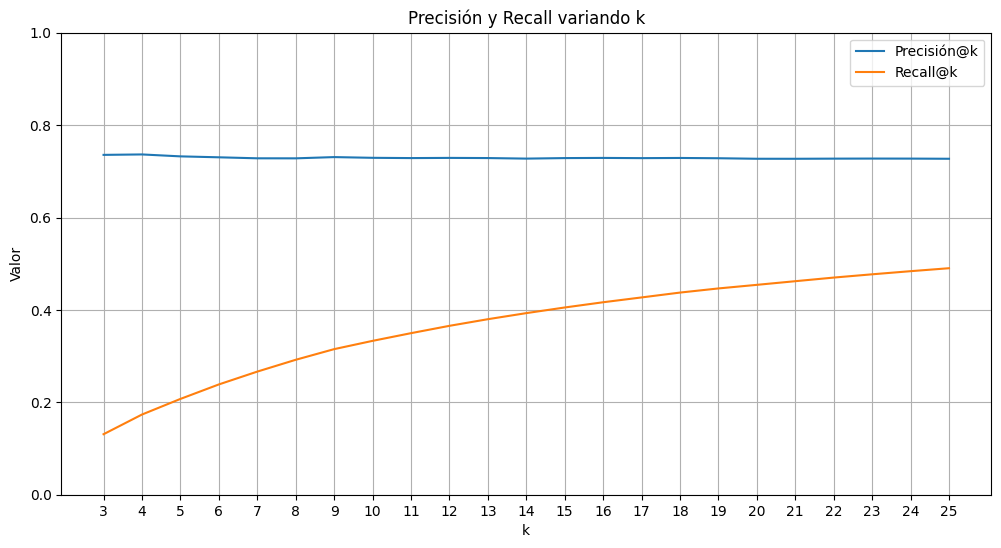

In [149]:
#Pregunta 4
ks = range(3, 26)
precisiones_k = []
recalls_k = []

for k in ks:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    precision_avg = sum(precisions.values()) / len(precisions)
    recall_avg = sum(recalls.values()) / len(recalls)
    precisiones_k.append(precision_avg)
    recalls_k.append(recall_avg)

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(ks, precisiones_k, label="Precisión@k")
plt.plot(ks, recalls_k, label="Recall@k")
plt.xlabel('k')
plt.ylabel('Valor')
plt.title('Precisión y Recall variando k')
plt.xticks(ks)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

En el gráfico, se observa que la precisión se mantiene relativamente constante a medida que aumenta el valor de k, con un valor cercano a 0.73. Esto indica que el modelo sigue recomendando elementos relevantes, aunque se esté ampliando el número de recomendaciones. Sin embargo, el recall aumenta de forma continua a medida que k crece. Esto es esperado, ya que al recomendar más elementos (al incrementar k), el modelo es capaz de recuperar una mayor proporción de los elementos relevantes, lo que mejora el recall. El comportamiento refleja el típico compromiso entre precisión y recall: al aumentar k, se mejora el recall a costa de mantener una precisión constante o ligeramente decreciente. Esto sugiere que el modelo es capaz de encontrar elementos relevantes, pero si se desean más recomendaciones relevantes (mayor recall), es necesario aumentar k.

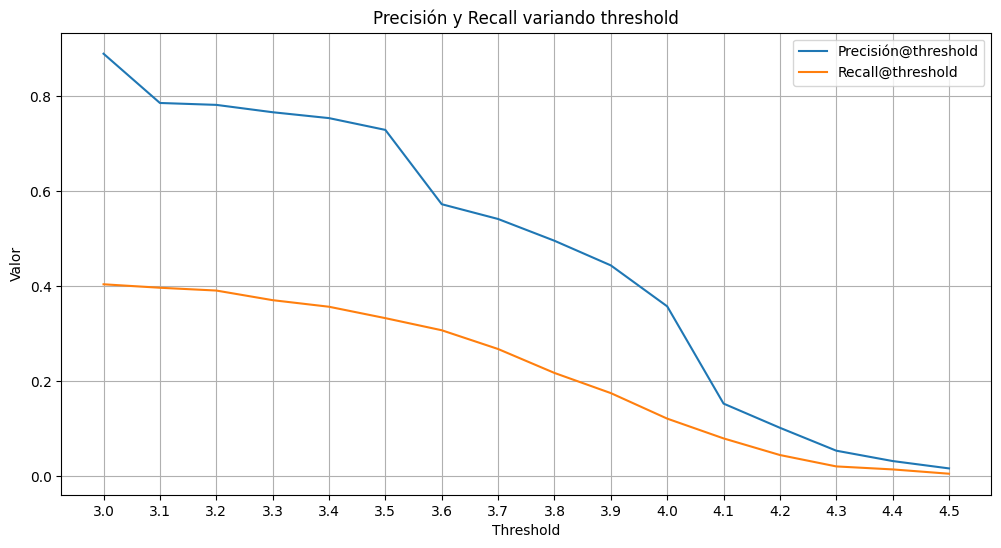

In [153]:
# Pregunta 5
thresholds = [x/10.0 for x in range(30, 46)]
precisiones_threshold = []
recalls_threshold = []

for threshold in thresholds:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=threshold)
    precision_avg = sum(precisions.values()) / len(precisions)
    recall_avg = sum(recalls.values()) / len(recalls)
    precisiones_threshold.append(precision_avg)
    recalls_threshold.append(recall_avg)

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(thresholds, precisiones_threshold, label="Precisión@threshold")
plt.plot(thresholds, recalls_threshold, label="Recall@threshold")
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precisión y Recall variando threshold')
plt.xticks(thresholds)
plt.legend()
plt.grid()
plt.show()

En el gráfico de precisión y recall en función del threshold, se observa un comportamiento inversamente proporcional entre ambas métricas. A medida que el threshold aumenta (es decir, el modelo se vuelve más exigente al considerar una predicción como relevante), la precisión también aumenta inicialmente, pero luego comienza a decrecer notablemente a partir del threshold de 3.6. Esto indica que el modelo es más selectivo y comete menos errores al recomendar solo las cervezas con calificaciones más altas. Sin embargo, este aumento en selectividad reduce el número de cervezas recomendadas, lo que afecta negativamente al recall, que disminuye de manera constante. Esto se debe a que, al ser más exigente, el modelo deja fuera muchas cervezas que podrían haber sido relevantes, reduciendo así la capacidad de recuperar todos los ítems relevantes. Este gráfico refleja el compromiso clásico entre precisión y recall, donde aumentar el threshold mejora la precisión a expensas del recall, y viceversa.

In [159]:
# Pregunta 6
# Identificar los valores faltantes en la matriz
missing_values = matriz_usuario_producto.isnull()

# Predecir ratings solo para los valores faltantes
for userId in missing_values.index:
    for beerId in missing_values.columns:
        if missing_values.loc[userId, beerId]:  # Si el valor está faltante
            # Predecir el rating faltante usando el modelo entrenado (model_svd)
            pred = model_svd.predict(userId, beerId)
            # Asignar el rating estimado a la celda correspondiente
            matriz_usuario_producto.loc[userId, beerId] = pred.est


In [160]:
display(matriz_usuario_producto)

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.702856,3.961445,3.626833,3.738799,3.693942,3.654890,4.013632,3.856101,3.755470,3.826473,...,3.812448,4.097785,3.940342,4.027104,3.817174,3.930475,3.844106,4.309672,4.004646,3.719582
3,3.395000,3.765217,3.256849,3.478261,3.486831,3.426406,3.667164,3.557841,3.440668,3.679432,...,3.498312,3.842120,3.746209,3.848386,3.555627,3.755042,3.686996,3.930929,3.721106,3.426483
4,3.885038,4.157239,3.833468,3.873854,3.791908,3.812190,4.110584,3.986783,3.881659,4.086300,...,3.923188,4.250470,4.157013,4.195536,3.959052,4.190261,4.096330,4.321256,4.114740,3.833737
5,3.574038,3.963968,3.696313,3.613227,3.656193,3.431818,3.814016,3.616646,3.715427,3.881510,...,3.772314,4.099269,3.830233,4.113783,3.791732,3.922644,4.045476,3.989081,3.860801,3.564965
6,3.720203,3.969892,3.721823,3.826844,3.741853,3.608582,3.892157,3.775944,3.896529,4.047638,...,3.630690,4.211799,3.835146,3.974405,3.940314,4.070786,3.972052,4.213469,3.989964,3.792846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.749618,4.176377,3.781398,3.784015,3.869490,3.751245,3.810637,3.821984,3.826735,4.026848,...,3.725531,4.218847,3.993768,4.111338,3.862486,3.999741,4.056757,4.237489,4.100721,3.754233
25317,3.598751,3.818817,3.601694,3.545439,3.542759,3.471778,3.755668,3.762176,3.554146,3.914676,...,3.368382,3.883120,3.689700,3.920816,3.735636,3.902892,3.751141,4.007321,3.870566,3.681209
25923,3.897667,4.126208,3.977655,3.804336,3.863698,3.923150,4.201307,3.926095,3.945160,4.039707,...,3.969067,4.274995,4.131754,4.137188,3.940852,4.223219,4.167299,4.304457,4.113360,3.821702


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
